In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.distance import vincenty
# from tqdm import tqdm
# tqdm.pandas()
import tensorflow as tf
from keras.utils import to_categorical
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter
from scipy import stats
from dateutil import parser
from sklearn.preprocessing import LabelEncoder, StandardScaler

# import eli5
# from eli5.sklearn import PermutationImportance
# from skopt.space import Real
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# Change pandas viewing options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

Using TensorFlow backend.
C:\Users\lorie\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\lorie\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
train = pd.read_csv('listings.csv.gz', compression='gzip')
price_df = pd.read_csv('listings.csv')


In [3]:
train.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,10291,https://www.airbnb.com/rooms/10291,20190306190816,2019-03-06,Spacious Cottage in Mid-City!,NaN,"Spacious house located in Mid-City, New Orlean...","Spacious house located in Mid-City, New Orlean...",none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/99566384/f...,NaN,31004,https://www.airbnb.com/users/show/31004,Jill,2009-08-11,"New Orleans, Louisiana, United States",I'm from New Orleans and work in the insurance...,within an hour,100%,NaN,t,https://a0.muscache.com/im/users/31004/profile...,https://a0.muscache.com/im/users/31004/profile...,Navarre,1,1,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"New Orleans, LA, United States",Navarre,Navarre,NaN,New Orleans,LA,70124,New Orleans,"New Orleans, LA",US,United States,29.98666,-90.10928,t,Cottage,Entire home/apt,4,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$300.00,NaN,NaN,$0.00,$100.00,4,$0.00,2,365,2,2,365,365,2.0,365.0,4 weeks ago,t,13,32,60,331,2019-03-06,96,14,2011-03-07,2019-02-17,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,17STR-04686,"{""Louisiana State"","" New Orleans"","" LA""}",f,f,moderate,t,f,1,1,0,0,0.99
1,19091,https://www.airbnb.com/rooms/19091,20190306190816,2019-03-06,Fully Furnished Cozy Apartment,CITY OF NEW ORLEANS STR LICENSE PERMIT NUMBER:...,SEE SPECIAL REDUCED SUMMER PRICING! This apa...,CITY OF NEW ORLEANS STR LICENSE PERMIT NUMBER:...,none,"NorthWest Carrollton, where this apartment is ...",NaN,If you are going to use the trolley or bus sys...,Guests who stay for a week or longer will have...,The host is available for help with the apartm...,No smoking! No drugs. No pets. On street par...,NaN,NaN,https://a0.muscache.com/im/pictures/957168/75e...,NaN,72880,https://www.airbnb.com/users/show/72880,John,2010-01-23,"New Orleans, Louisiana, United States",I recently (2018) retired as the Director of B...,within an hour,100%,NaN,t,https://a0.muscache.com/im/users/72880/profile...,https://a0.muscache.com/im/users/72880/profile...,Riverbend,1,1,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"New Orleans, LA, United States",Uptown/Carrollton District,Leonidas,NaN,New Orleans,LA,70118,New Orleans,"New Orleans, LA",US,United States,29.96257,-90.11877,t,Apartment,Entire home/apt,3,1.0,

In [4]:
import geopy
from geopy import distance
from geopy.distance import vincenty


In [5]:

lon = -90.0680352
lat = 29.9585246
train['distance_center'] = train.apply(lambda x: vincenty((x['latitude'], x['longitude']), (lat, lon)).miles, axis = 1)




In [6]:
train['distance_center'].describe()

count    6632.000000
mean        1.946200
std         1.576078
min         0.029375
25%         0.913820
50%         1.662018
75%         2.597029
max        24.292619
Name: distance_center, dtype: float64

In [7]:
train.isnull().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
name                                               2
summary                                          123
space                                           1054
description                                       40
experiences_offered                                0
neighborhood_overview                           1563
notes                                           2699
transit                                         1598
access                                          1997
interaction                                     1507
house_rules                                     1861
thumbnail_url                                   6632
medium_url                                      6632
picture_url                                        0
xl_picture_url                                

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline


In [9]:
train = train.drop(columns=['listing_url','last_scraped','thumbnail_url', 'medium_url','picture_url','xl_picture_url','host_url','host_thumbnail_url','host_picture_url', 'neighbourhood','neighbourhood_group_cleansed','summary', 'neighborhood_overview','scrape_id','host_name','name', 'id', 'host_id', 'latitude', 'longitude', 'last_review', 'reviews_per_month'])


In [10]:
train.head()

,space,description,experiences_offered,notes,transit,access,interaction,house_rules,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,distance_center
0,"Spacious house located in Mid-City, New Orlean...","Spacious house located in Mid-City, New Orlean...",none,NaN,NaN,NaN,NaN,NaN,2009-08-11,"New Orleans, Louisiana, United States",I'm from New Orleans and work in the insurance...,within an hour,100%,NaN,t,Navarre,1,1,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"New Orleans, LA, United States",Navarre,New Orleans,LA,70124,New Orleans,"New Orleans, LA",US,United States,t,Cottage,Entire home/apt,4,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$300.00,NaN,NaN,$0.00,$100.00,4,$0.00,2,365,2,2,365,365,2.0,365.0,4 weeks ago,t,13,32,60,331,2019-03-06,96,14,2011-03-07,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,17STR-04686,"{""Louisiana State"","" New Orleans"","" LA""}",f,f,moderate,t,f,1,1,0,0,3.142252
1,SEE SPECIAL REDUCED SUMMER PRICING! This apa...,CITY OF NEW ORLEANS STR LICENSE PERMIT NUMBER:...,none,NaN,If you are going to use the trolley or bus sys...,Guests who stay for a week or longer will have...,The host is available for help with the apartm...,No smoking! No drugs. No pets. On street par...,2010-01-23,"New Orleans, Louisiana, United States",I recently (2018) retired as the Director of B...,within an hour,100%,NaN,t,Riverbend,1,1,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"New Orleans, LA, United States",Leonidas,New Orleans,LA,70118,New Orleans,"New Orleans, LA",US,United States,t,Apartment,Entire home/apt,3,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",750.0,$100.00,NaN,"$2,400.00",$0.00,$60.00,2,$12.00,1,365,1,1,365,365,1.0,365.0,a week ago,t,4,12,32,303,2019-03-06,432,73,2010-04-16,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,City registration pending,"{""Louisiana State"","" New Orleans"","" LA""}",t,f,strict_14_with_grace_period,f,f,1,1,0,0,3.055678
2,Charming shotgun apartment in the Marigny neig...,Charming shotgun apartment in the Marigny neig...,none,NaN,NaN,NaN,NaN,Smoking is permitted on the front porch No ind...,2010-04-27,"New Orleans, Louisiana, United States",I own and manage an ocean-going tugboat compan...,within a few hours,100%,NaN,t,Marigny/Bywater,2,2,"['email', 'phone', 'reviews', 'kba', 'work_ema...",t,t,"New Orleans, LA, United States",Marigny,New Orleans,LA,70117,New Orleans,"New Orleans, LA",US,United States,t,House,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",""Free str...",NaN,$125.00,$720.00,NaN,NaN,NaN,2,$0.00,4,20,4,4,20,20,4.0,20.0,a week ago,t,2,4,23,23,2019-03-06,222,26,2010-07-04,99.0

In [11]:
df = train.groupby(['neighbourhood_cleansed']).mean()
price_grouped = price_df.groupby(['neighbourhood']).mean()
price = price_grouped['price']

In [12]:
df['price']=price

In [13]:
df['price'].head()
import locale
locale.setlocale(locale.LC_ALL,'')
# df['price']=df.price.map(lambda x: locale.atof(x.strip('$')))

'English_United States.1252'

In [14]:
price_high = df.loc[(df['price']>=225)]
price_mid = df[(df['price']>150) & (df['price'] <225)]
price_low = df[(df['price']>=0) & (df['price'] <150)]
p_low = price_low.reset_index()
p_mid = price_mid.reset_index()
p_high = price_high.reset_index()

In [15]:
def bar_price(feature, index):
    fig, ax = plt.subplots()
    x_axis = np.arange(len(feature['price']))
    ax.bar(x_axis, feature['price'])
    labels =index['neighbourhood_cleansed']
    ax.set_xticks(x_axis)
    ax.set_xticklabels(labels, rotation=50, ha="right")

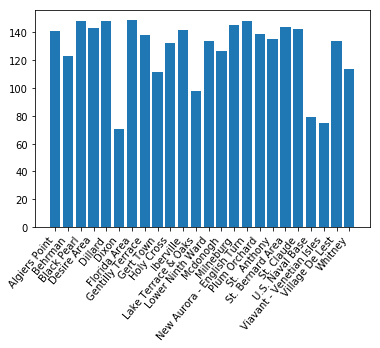

In [16]:
bar_price(price_low, p_low)

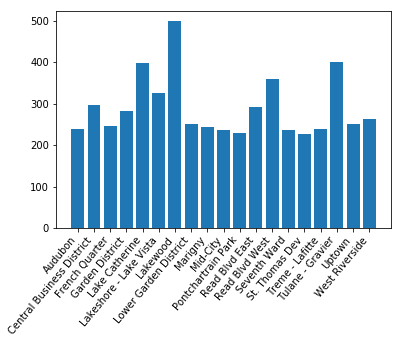

In [17]:
bar_price(price_high, p_high)

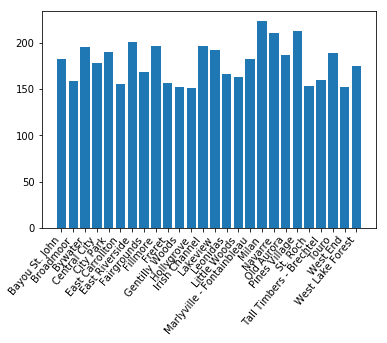

In [18]:
bar_price(price_mid, p_mid)

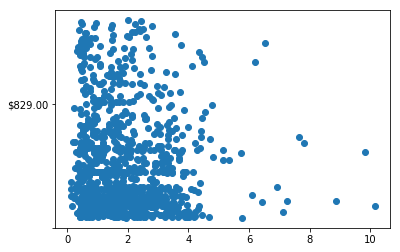

In [19]:
sample = train.sample(1000, random_state=42)
labels = ['0','50','100','150','200','250','300','350','400','450','500']
import locale
locale.setlocale(locale.LC_ALL,'')
# train['price']=float(train.price.map(lambda x: locale.atof(x.strip('$'))))
train['price']=(train['price'].replace( '[\$,)]','', regex=True )
                   .replace( '[(]','-',   regex=True ).astype(float))
price = sample['price']
dist = sample['distance_center']
fig, ax = plt.subplots()
ax.scatter(dist, price)
start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, 150))

In [20]:
train1 = pd.DataFrame({'Dist':train['distance_center'],'Acc':train['accommodates'],'Price':train['price']})
train1

,Dist,Acc,Price
0,3.142252,4,300.0
1,3.055678,3,100.0
2,0.904434,2,125.0
3,1.791290,2,115.0
4,2.314711,2,50.0
5,1.441765,2,123.0
6,1.951990,2,130.0
7,1.209424,2,105.0
8,1.941963,2,99.0
9,1.437073,5,91.0


In [24]:
bins = [0, .5,1,2,4,6, 10]
labels = [1, 2, 3, 4, 5, 6]
sample = train1.sample(6400, random_state=42)
train1['Dist'] = pd.cut(train1['Dist'], bins=bins, labels=labels)
bins1 = [0,50,100, 150, 200,300,600]
labels1 = [1,2,3,4,5,6]
train1['Price'] = pd.cut(train1['Price'], bins=bins1, labels=labels1)

In [25]:
train1

,Dist,Acc,Price
0,4.0,4,5.0
1,4.0,3,2.0
2,4.0,2,3.0
3,4.0,2,3.0
4,4.0,2,1.0
5,4.0,2,3.0
6,4.0,2,3.0
7,4.0,2,3.0
8,4.0,2,2.0
9,4.0,5,2.0


In [26]:


from sklearn.preprocessing import StandardScaler

x = train1.drop('Price', axis=1)
y = train1['Price']
print(x.shape, y.shape)

(6632, 2) (6632,)


In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=3316, random_state=10)
x_scaler = StandardScaler()
x_train_scaled = x_scaler.fit_transform(x_train)
x_test_scaled = x_scaler.fit_transform(x_test)


# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.fit_transform(y_train)
encoded_y_test = label_encoder.fit_transform(y_test)



# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)
print(y_train_categorical.shape, y_test_categorical.shape)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [118]:
from keras.models import Sequential
from keras.layers import Dense

# Create model and add layers
model = Sequential()
model.add(Dense(units=1000, activation='relu', input_dim=2))
model.add(Dense(units=100, activation='softmax'))
# model.add(Dense(units=373, activation='softmax'))
model.add(Dense(units=2, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 1000)              3000      
_________________________________________________________________
dense_44 (Dense)             (None, 100)               100100    
_________________________________________________________________
dense_45 (Dense)             (None, 2)                 202       
Total params: 103,302
Trainable params: 103,302
Non-trainable params: 0
_________________________________________________________________


In [119]:
model.compile(optimizer='adadelta',
              loss='mean_squared_logarithmic_error',
              metrics=['accuracy'])
model.fit(
    x_train_scaled,
    y_train_categorical,
    epochs=10,
    shuffle=True,
    verbose=2
)



Epoch 1/10
 - 1s - loss: 0.1028 - acc: 0.9119
Epoch 2/10
 - 0s - loss: 0.0713 - acc: 0.9349
Epoch 3/10
 - 0s - loss: 0.0539 - acc: 0.9349
Epoch 4/10
 - 0s - loss: 0.0442 - acc: 0.9349
Epoch 5/10
 - 0s - loss: 0.0385 - acc: 0.9349
Epoch 6/10
 - 0s - loss: 0.0350 - acc: 0.9349
Epoch 7/10
 - 0s - loss: 0.0328 - acc: 0.9349
Epoch 8/10
 - 0s - loss: 0.0315 - acc: 0.9349
Epoch 9/10
 - 0s - loss: 0.0306 - acc: 0.9349
Epoch 10/10
 - 0s - loss: 0.0301 - acc: 0.9349


In [120]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model_loss, model_accuracy = model.evaluate(x_test, y_test_categorical, verbose=2)

In [121]:
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 0.2227075739760307, Accuracy: 0.9439083232810616
